In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
# from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA
# from scipy.fft import dct
# from sklearn.linear_model import LogisticRegression
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import NMF
# from sklearn import preprocessing
# from sklearn.model_selection import cross_val_score

df = pd.read_csv('CW_Data.csv')
#缺失值处理
df.drop(df[df['Programme'].isnull()].index, inplace=True)  # Remove empty rows
print(df)
print(df.describe())
Data=df.values

      ID  Q1  Q2  Q3  Q4  Q5  Programme
0      1  32   7   3  12   4          1
1      2  32   7  10  12  12          2
2      3  12   0   0   0   0          1
3      4  16   0   2   0   1          3
4      5  28   0   0   0   0          2
..   ...  ..  ..  ..  ..  ..        ...
509  510  26   0   7   0   4          2
510  511  34   5  10  20  20          2
511  512  14   7  10   2   0          1
512  513  22   1  10   0   6          0
513  514  24   0  10   2   4          0

[514 rows x 7 columns]
               ID          Q1          Q2          Q3          Q4          Q5  \
count  514.000000  514.000000  514.000000  514.000000  514.000000  514.000000   
mean   257.500000   25.836576    3.583658    7.793774    5.249027    7.931907   
std    148.523287    7.235697    3.218157    3.803697    6.323342    6.719182   
min      1.000000    4.000000    0.000000    0.000000    0.000000    0.000000   
25%    129.250000   22.000000    1.000000    6.000000    0.000000    2.000000   
50%    257

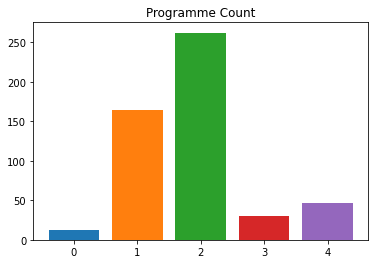

In [49]:
###查看不同专业各有多少学生
plt.figure()
plt.title('Programme Count')
programme_count = df['Programme'].value_counts()  # value_counts()查看Programme中有哪些不同的值，并计算每个值有多少个重复值
for i in range(0, 5):
    plt.bar(str(i), programme_count[i])  # plt.bar(x,y,width,label)柱状图
plt.savefig('programme_count(5).png', dpi=500, bbox_inches='tight')
plt.show()

In [50]:
Programme_0 = []
Programme_1 = []
Programme_2 = []
Programme_3 = []
Programme_4 = []
for i in range(len(Data)):  # len(data),指data的行数
    if Data[i, -1] == 0:# -1指最后一列
        Programme_0.append(Data[i, 1:-1])
    elif Data[i, -1] == 1: 
        Programme_1.append(Data[i, 1:-1])
    elif Data[i, -1] == 2:
        Programme_2.append(Data[i, 1:-1])
    elif Data[i, -1] == 3:
        Programme_3.append(Data[i, 1:-1])
    elif Data[i, -1] == 4:
        Programme_4.append(Data[i, 1:-1])
print(len(Programme_0))  # 12       
print(len(Programme_1))  # 164
print(len(Programme_2))  # 262
print(len(Programme_3))  # 30
print(len(Programme_4))  # 46

12
164
262
30
46


In [51]:
# 对于Programme为0的学生，由于他们并不是同一个专业的，且该分类样本很少，所以，我们直接对其进行删除处理。
df.drop(df[df.Programme==0].index, inplace=True)
# 对于ID这一信息，由于每个学生都有一个特定的ID值，所以其信息熵过大。尤其对于决策树和随机森林模型，会产生非常大的负面影响。所以，对于ID这一列也直接删除
df.drop(labels="ID", axis=1, inplace=True)  # Remove ID column

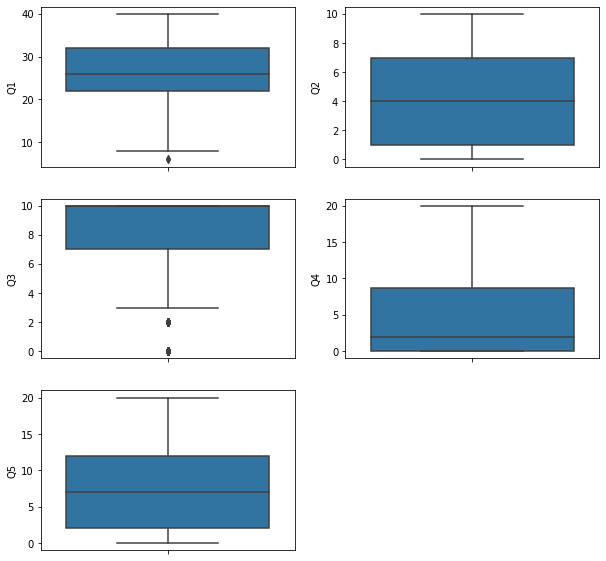

In [52]:
names = ['Q1','Q2','Q3','Q4','Q5']
i = 1
fig = plt.figure(figsize=(10, 10))
for name in names:
    ax1 = plt.subplot(3, 2, i) # 两行一列，位置是1的子图
    i += 1
    sns.boxplot(y=df[name])
plt.show()

In [53]:
df

,Q1,Q2,Q3,Q4,Q5,Programme
0,32,7,3,12,4,1
1,32,7,10,12,12,2
2,12,0,0,0,0,1
3,16,0,2,0,1,3
4,28,0,0,0,0,2
...,...,...,...,...,...,...
507,32,0,10,2,0,1
508,30,1,10,5,0,2
509,26,0,7,0,4,2
510,34,5,10,20,20,2


Means[26.07569721115538, 3.6633466135458166, 7.872509960159363, 5.3585657370517925, 8.0597609561753]
Medians[26.0, 4.0, 10.0, 2.0, 7.0]
STD[7.014260282974793, 3.213651512421954, 3.744281238224295, 6.356579593335441, 6.728882420237306]
Range[34, 10, 10, 20, 20]


<function matplotlib.pyplot.show(close=None, block=None)>

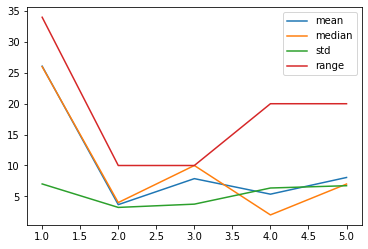

In [54]:
#mean
Qmean=[]
for i in range(1,6):
    Qmean.append(df['Q'+str(i)].mean())
print("Means"+str(Qmean))

#median
Qmedian=[]
for i in range(1,6):
    Qmedian.append(df['Q'+str(i)].median())
print("Medians"+str(Qmedian))

#std
Qstd=[]
for i in range(1,6):
    Qstd.append(df['Q'+str(i)].std())
print("STD"+str(Qstd))

#range
Qrange=[]
for i in range(1,6):
    Qrange.append(df['Q'+str(i)].max()-df['Q'+str(i)].min())
print("Range"+str(Qrange))

question=[1,2,3,4,5]
plt.plot(question, Qmean, label="mean")
plt.plot(question, Qmedian, label="median")
plt.plot(question, Qstd, label="std")
plt.plot(question, Qrange, label="range")
plt.legend()
plt.show

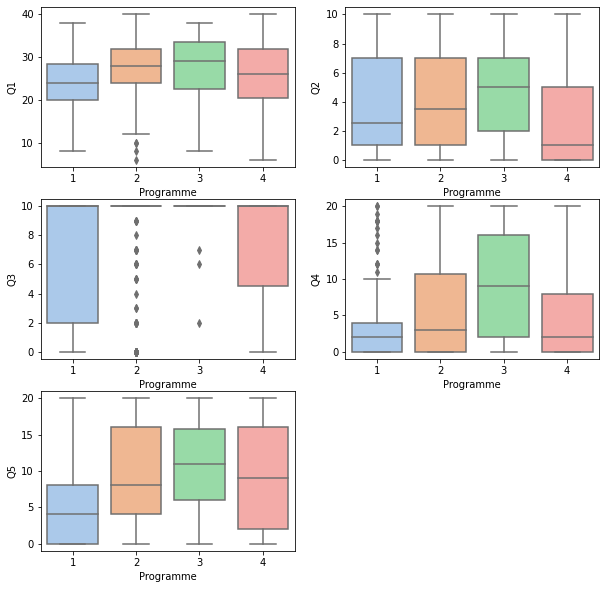

In [55]:
names = ['Q1','Q2','Q3','Q4','Q5']
i = 1
fig = plt.figure(figsize=(10, 10))
for name in names:
    ax1 = plt.subplot(3, 2, i) # 两行一列，位置是1的子图
    i += 1
    sns.boxplot(y=df[name],x="Programme",data=df,palette="pastel")
plt.show()

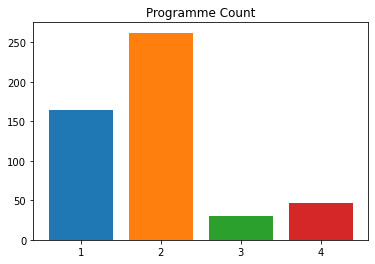

In [56]:
###查看删除Programme=0的情况后不同专业各有多少学生
plt.figure()
plt.title('Programme Count')
programme_count = df['Programme'].value_counts()  # value_counts()查看Programme中有哪些不同的值，并计算每个值有多少个重复值
for i in range(0, 4):
    plt.bar(str(i+1), programme_count[i+1])  # plt.bar(x,y,width,label)柱状图
plt.savefig('/Users/a123/Desktop/图/人数柱状图(4programme).png', dpi=500, bbox_inches='tight')
plt.show()

In [57]:
# SMOTE过采样
data = df.iloc[:, 0:5]
label = df['Programme']
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_resample(data, label)

In [58]:
df_new = pd.concat([X_smo, y_smo], axis=1)
df_new

,Q1,Q2,Q3,Q4,Q5,Programme
0,32,7,3,12,4,1
1,32,7,10,12,12,2
2,12,0,0,0,0,1
3,16,0,2,0,1,3
4,28,0,0,0,0,2
...,...,...,...,...,...,...
1043,32,0,8,3,2,4
1044,30,2,10,0,14,4
1045,12,0,1,0,0,4
1046,31,0,10,0,16,4


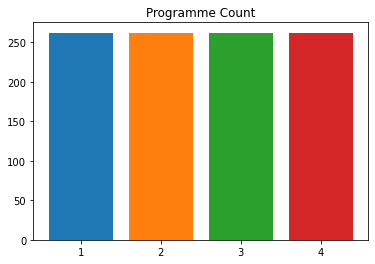

In [59]:
###查看SMOTE过采样处理后不同专业各有多少学生
plt.figure()
plt.title('Programme Count')
programme_count = df_new['Programme'].value_counts()  # value_counts()查看Programme中有哪些不同的值，并计算每个值有多少个重复值
for i in range(0, 4):
    plt.bar(str(i+1), programme_count[i+1])  # plt.bar(x,y,width,label)柱状图
plt.show()

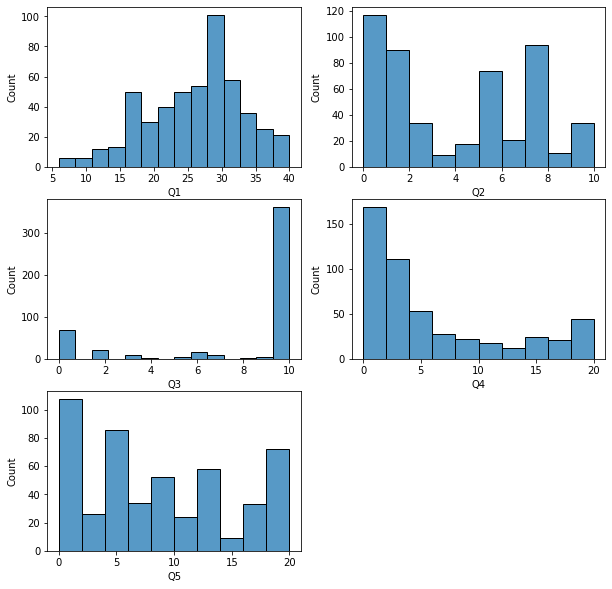

In [60]:
fig = plt.figure(figsize=(10, 10))
i = 1
for name in names:
    ax1 = plt.subplot(3, 2, i) # 两行一列，位置是1的子图
    i += 1
    sns.histplot(x=df[name])

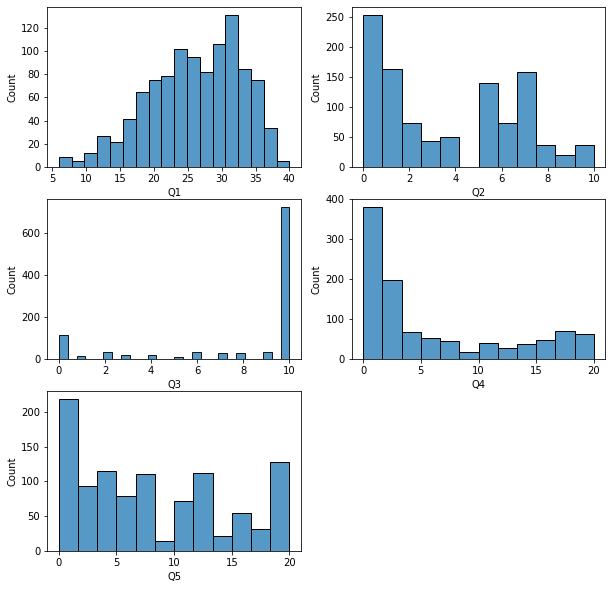

In [61]:
fig = plt.figure(figsize=(10, 10))
i = 1
for name in names:
    ax1 = plt.subplot(3, 2, i) # 两行一列，位置是1的子图
    i += 1
    sns.histplot(x=df_new[name])

In [62]:
data = df_new.iloc[:, 0:5]
label = df_new['Programme']
data

,Q1,Q2,Q3,Q4,Q5
0,32,7,3,12,4
1,32,7,10,12,12
2,12,0,0,0,0
3,16,0,2,0,1
4,28,0,0,0,0
...,...,...,...,...,...
1043,32,0,8,3,2
1044,30,2,10,0,14
1045,12,0,1,0,0
1046,31,0,10,0,16


<AxesSubplot:ylabel='Count'>

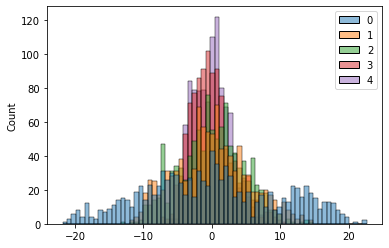

In [63]:
from sklearn.decomposition import PCA
# 分布可视化
pca = PCA()
data_pca = pca.fit_transform(data)  #data = df_new.iloc[:, 0:5]
sns.histplot(data_pca)

In [64]:
#PCA不降维
pca.explained_variance_ratio_

array([0.59403506, 0.1725379 , 0.13324744, 0.05892202, 0.04125758])

In [65]:
data_new = df_new.values

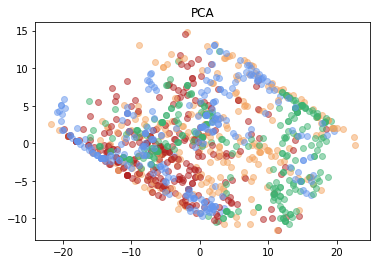

In [66]:
#PCA降到二维
plt.figure()
plt.title('PCA')
pca_2 = PCA(n_components=2)
pca_reduced_X_2 = pca_2.fit_transform(data)
for i in range(len(data_new)):  
    if data_new[i, -1] == 1:
        plt.scatter(pca_reduced_X_2[i][0], pca_reduced_X_2[i][1], alpha=0.5, c='firebrick')
    elif data_new[i, -1] == 2:
        plt.scatter(pca_reduced_X_2[i][0], pca_reduced_X_2[i][1], alpha=0.5, c='sandybrown')
    elif data_new[i, -1] == 3:
        plt.scatter(pca_reduced_X_2[i][0], pca_reduced_X_2[i][1], alpha=0.5, c='mediumseagreen')
    elif data_new[i, -1] == 4:
        plt.scatter(pca_reduced_X_2[i][0], pca_reduced_X_2[i][1], alpha=0.5, c='cornflowerblue')
plt.show()

In [67]:
#PCA降到二维
pca_2.explained_variance_ratio_

array([0.59403506, 0.1725379 ])

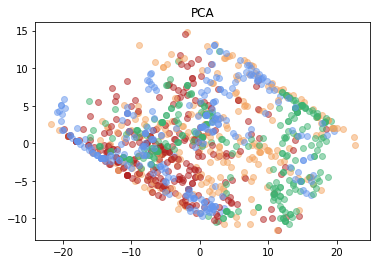

In [68]:
#PCA降到三维
plt.figure()
plt.title('PCA')
pca_3 = PCA(n_components=3)
pca_reduced_X_3 = pca_3.fit_transform(data)
for i in range(len(data_new)):  
    if data_new[i, -1] == 1:
        plt.scatter(pca_reduced_X_3[i][0], pca_reduced_X_3[i][1], alpha=0.5, c='firebrick')
    elif data_new[i, -1] == 2:
        plt.scatter(pca_reduced_X_3[i][0], pca_reduced_X_3[i][1], alpha=0.5, c='sandybrown')
    elif data_new[i, -1] == 3:
        plt.scatter(pca_reduced_X_3[i][0], pca_reduced_X_3[i][1], alpha=0.5, c='mediumseagreen')
    elif data_new[i, -1] == 4:
        plt.scatter(pca_reduced_X_3[i][0], pca_reduced_X_3[i][1], alpha=0.5, c='cornflowerblue')
plt.show()

In [69]:
#PCA降到三维
pca_3.explained_variance_ratio_

array([0.59403506, 0.1725379 , 0.13324744])

In [70]:
pca = PCA(n_components=0.90)
pca.fit(data)
pca.explained_variance_ratio_

array([0.59403506, 0.1725379 , 0.13324744, 0.05892202])

In [71]:
data_pca = data_pca[:, 0:3]
data_pca.shape

(1048, 3)

<AxesSubplot:ylabel='Count'>

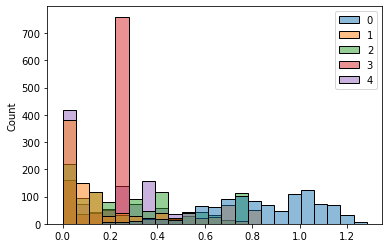

In [72]:
from sklearn.decomposition import NMF
nmf = NMF()
data_nmf = nmf.fit_transform(data)
sns.histplot(data_nmf)

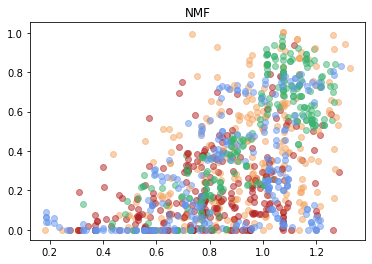

In [73]:
#NMF降到二维
plt.figure()
plt.title('NMF')
nmf_2 = NMF(n_components=2)
nmf_reduced_X_2 = nmf_2.fit_transform(data)
for i in range(len(data_new)):  
    if data_new[i, -1] == 1:
        plt.scatter(nmf_reduced_X_2[i][0], nmf_reduced_X_2[i][1], alpha=0.5, c='firebrick')
    elif data_new[i, -1] == 2:
        plt.scatter(nmf_reduced_X_2[i][0], nmf_reduced_X_2[i][1], alpha=0.5, c='sandybrown')
    elif data_new[i, -1] == 3:
        plt.scatter(nmf_reduced_X_2[i][0], nmf_reduced_X_2[i][1], alpha=0.5, c='mediumseagreen')
    elif data_new[i, -1] == 4:
        plt.scatter(nmf_reduced_X_2[i][0], nmf_reduced_X_2[i][1], alpha=0.5, c='cornflowerblue')
plt.show()

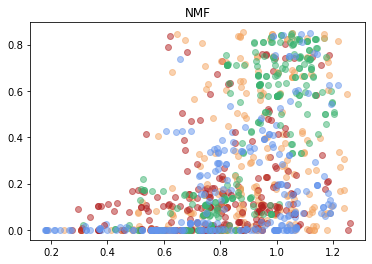

In [74]:
#NMF降到三维
plt.figure()
plt.title('NMF')
nmf_3 = NMF(n_components=3)
nmf_reduced_X_3 = nmf_3.fit_transform(data)
for i in range(len(data_new)):  
    if data_new[i, -1] == 1:
        plt.scatter(nmf_reduced_X_3[i][0], nmf_reduced_X_3[i][1], alpha=0.5, c='firebrick')
    elif data_new[i, -1] == 2:
        plt.scatter(nmf_reduced_X_3[i][0], nmf_reduced_X_3[i][1], alpha=0.5, c='sandybrown')
    elif data_new[i, -1] == 3:
        plt.scatter(nmf_reduced_X_3[i][0], nmf_reduced_X_3[i][1], alpha=0.5, c='mediumseagreen')
    elif data_new[i, -1] == 4:
        plt.scatter(nmf_reduced_X_3[i][0], nmf_reduced_X_3[i][1], alpha=0.5, c='cornflowerblue')
plt.show()

<AxesSubplot:ylabel='Count'>

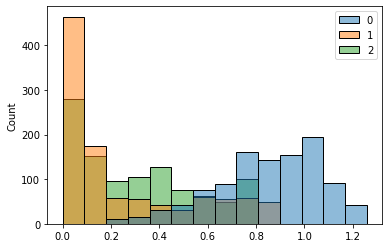

In [75]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=3,  # k value,默认会保留全部特征
          init=None,  # W H 的初始化方法，包括'random' | 'nndsvd'(默认) |  'nndsvda' | 'nndsvdar' | 'custom'.
          solver='cd',  # 'cd' | 'mu'
          beta_loss='frobenius',  # {'frobenius', 'kullback-leibler', 'itakura-saito'}，一般默认就好
          tol=1e-4,  # 停止迭代的极限条件
          max_iter=200,  # 最大迭代次数
          random_state=None,
          alpha=0.,  # 正则化参数
          l1_ratio=0.,  # 正则化参数
          verbose=0,  # 冗长模式
          shuffle=False  # 针对"cd solver"
          )
data_nmf = nmf.fit_transform(data)
sns.histplot(data_nmf)

In [76]:
data = np.hstack((data_pca, data_nmf))
data.shape

(1048, 6)

In [77]:
# 将未重采样的原始数据作为test测试集,将重采样后的容量更大的数据作为train训练集
X_test = df.iloc[:, 0:5]
test_pca = pca.transform(X_test)[:, 0:3] #将原数据pca的前三个特征赋值给test_pca
test_nmf = nmf.transform(X_test) #将原数据nmf的前三个特征赋值给test_nmf
X_test = np.hstack((test_pca, test_nmf)) #将原数据pca三个特征nmf三个特征拼接的数据赋值给X_train
X_test.shape

(502, 6)

In [78]:
from sklearn.preprocessing import StandardScaler #使用该类的好处在于可以保存训练集中的参数（均值、方差）直接使用其对象转换测试集数据。
#标准化即Z-score
scale = StandardScaler()

In [79]:
X_train = data  #data = np.hstack((data_pca, data_nmf)) 将重采样后pca三个特征nmf三个特征拼接的数据赋值给X_train
y_train = label # label = df_new['Programme']
y_test = df.iloc[:,5] #原数据第6列所有行(即Programme的所有行)
y_test.shape

(502,)

In [80]:
#对训练集和测试集数据标准化
X_train = scale.fit_transform(X_train) 
X_test = scale.transform(X_test)

In [81]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1048, 6) (502, 6) (1048,) (502,)


In [82]:
from sklearn.feature_extraction import DictVectorizer   #标称型特征向量化
from sklearn.compose import ColumnTransformer   #特征列处理
from sklearn.pipeline import Pipeline   #数据转换、模型多步骤处理
from sklearn.impute import SimpleImputer   #填充缺失值
from sklearn.preprocessing import StandardScaler, OneHotEncoder   #标准化、向量化
from sklearn.model_selection import train_test_split, GridSearchCV   #划分训练集、网络检索（参数调优）
from sklearn.tree import DecisionTreeClassifier   #决策树
from sklearn.ensemble import RandomForestClassifier   #随机森林
from sklearn.svm import SVC   #逻辑回归

In [83]:
#构建决策树，随机森林，SVM支持向量机
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)), 
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("SVM_model", SVC(random_state=42))] 

In [84]:
#在训练集上对每个模型进行五折交叉验证，然后取交叉验证的平均结果来评估模型
#在原始数据集上，进行5次划分，每次划分进行一次训练、评估，最后得到5次划分后的评估结果，
#一般在这几次评估结果上取平均得到最后的 评分。k-fold cross-validation ，其中，k一般取5或10。
from sklearn.model_selection import cross_val_score
for name,model in base_models:
    clf = Pipeline(steps=[('classifier', model)])
    score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    print("%s score: %.3f" % (name,score))

DT_model score: 0.598
RF_model score: 0.645
SVM_model score: 0.450


In [85]:
from sklearn.ensemble import RandomForestClassifier as rfc
clf = rfc()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# y_test: 是样本真实分类结果，pred: 是样本预测分类结果
print(confusion_matrix(y_test, pred))

[[158   3   0   3]
 [  6 252   2   2]
 [  0   0  30   0]
 [  1   0   0  45]]


In [87]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96       164
           2       0.99      0.96      0.97       262
           3       0.94      1.00      0.97        30
           4       0.90      0.98      0.94        46

    accuracy                           0.97       502
   macro avg       0.95      0.98      0.96       502
weighted avg       0.97      0.97      0.97       502



In [88]:
#用于忽视warning信息
import warnings
warnings.filterwarnings("ignore")

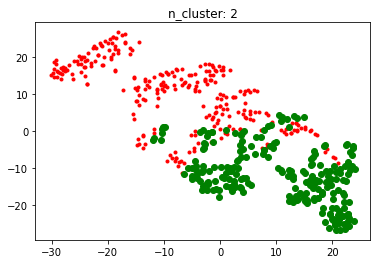

(0.0789542245120302, 0.06096714852359884)


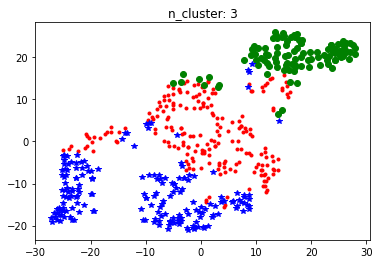

(0.03940743323525191, 0.038780817441861605)


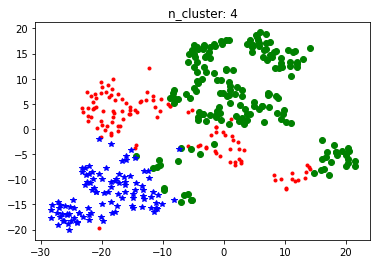

(0.040604303870303025, 0.04503840460385547)


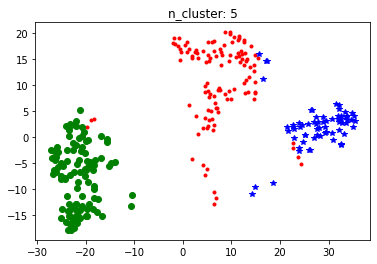

(0.03759451082960683, 0.04458266268243058)


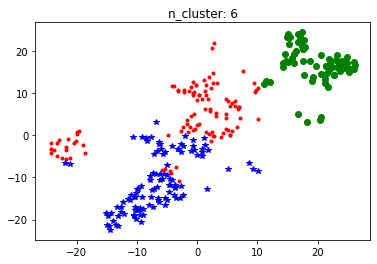

(0.038995479379139775, 0.04811576067850927)


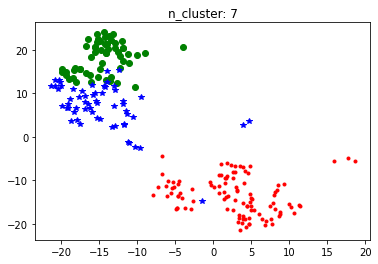

(0.04086439890255698, 0.051979156489549865)


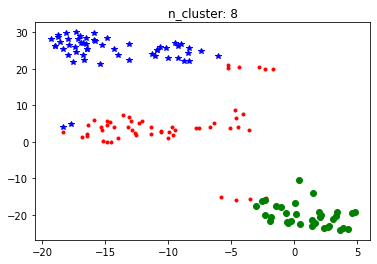

(0.04065254843347407, 0.052890392146086665)


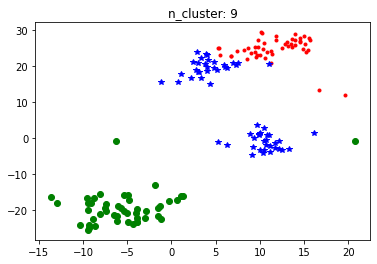

(0.038604264569855766, 0.05147780350062254)


In [89]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import homogeneity_completeness_v_measure
import matplotlib.pyplot as plt
#KMeans聚类，进行的是无监督的聚类，，这里我们应假定自己不知道具体有几个分类。
#我们将聚类数从2开始逐渐递增。我们使用homogeneity和completeness来评价聚类结果，
#并将聚类结果可视化。由于我们的数据维度>2，所以要先使用TSNE进行降维，然后再进行可视化
def draw(model):
    tsne = TSNE()
    tsne.fit_transform(data)
    tsne = pd.DataFrame(tsne.embedding_, index=data.index)
    r = tsne[model.labels_ == 0]
    plt.plot(r[0], r[1], "r.")
    g = tsne[model.labels_ == 1]
    plt.plot(g[0], g[1], "go")
    b = tsne[model.labels_ == 2]
    plt.plot(b[0], b[1], "b*")
    q = tsne[model.labels_ == -1]
    plt.plot(q[0], q[1], "cx")
    plt.show()
data = df.iloc[:, 0:5]
label = df.iloc[:, 5]
for i in range(2, 10):
    model = KMeans(n_clusters=i).fit(data)
    plt.title('n_cluster: {}'.format(i))
    draw(model)
    result = homogeneity_completeness_v_measure(label,model.labels_)[1:3]
    print(result)

,min_samples,eps,n_clusters,homogeneity,completeness
0,5,0.5,2,0.071816,8.043088e-03
1,5,0.6,2,0.071816,8.043088e-03
2,5,0.7,2,0.071816,8.043088e-03
3,5,0.8,2,0.071816,8.043088e-03
4,5,0.9,2,0.071816,8.043088e-03
5,5,1.0,2,0.071816,8.043088e-03
6,5,1.1,3,0.050397,1.001433e-02
7,6,0.5,2,0.071816,8.043088e-03
8,6,0.6,2,0.071816,8.043088e-03
9,6,0.7,2,0.071816,8.043088e-03


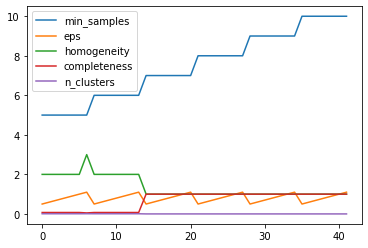

In [90]:
def run_dbscan():
    result = {
        "min_samples":[],
        "eps":[],
        "n_clusters":[],
        "homogeneity":[],
        "completeness":[]
    }
    min_samples=[]
    eps=[]
    n_clusters=[]
    homogeneity=[]
    completeness=[]
    for i in range(5,11):
        for j in np.arange(0.5,1.1,0.1):
            model = DBSCAN(eps=j,min_samples=i,metric="euclidean").fit(data)  # 聚成5类
            homo, com = homogeneity_completeness_v_measure(label, model.labels_)[1:3]
            n_cluster = pd.DataFrame(model.labels_).value_counts().shape[0]
            result["min_samples"].append(i)
            result["eps"].append(j)
            result["homogeneity"].append(homo)
            result["completeness"].append(com)
            result["n_clusters"].append(n_cluster)
            min_samples.append(i)
            eps.append(j)
            n_clusters.append(n_cluster)
            homogeneity.append(homo)
            completeness.append(com)
    df = pd.DataFrame(result)
    num=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]
    plt.plot(num, min_samples, label="min_samples")
    plt.plot(num, eps, label="eps")
    plt.plot(num, n_clusters, label="homogeneity")
    plt.plot(num, homogeneity, label="completeness")
    plt.plot(num, completeness, label="n_clusters")
    plt.legend()
    plt.show
    return df
run_dbscan()
# 选择方法：
# n_clusters聚类数无明显优势
# eps半径处于一个突变中
# min_samples选取最小个数也是处于一个剑锋

# outliners异常值处于突变
# stats样本聚类数分布较平均

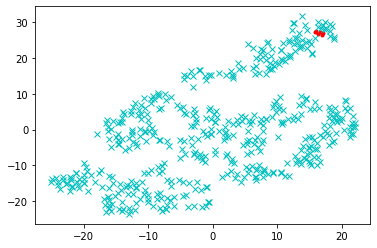

In [91]:
draw(DBSCAN(eps=0.5,min_samples=5).fit(data))